## El mapeo de Hénon




In [2]:
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays
using PyCall
using LaTeXStrings
@pyimport matplotlib.patches as patch
@pyimport numpy as np
#@pyimport matplotlib.pyplot as plt

In [3]:
push!(LOAD_PATH,"/home/eve/Documents/Tesis-v-1.0.2/Programas/IPM")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/eve/Documents/Tesis-v-1.0.2/Programas/IPM"

In [5]:
using ParametrizacionMetodo
using mapeos

In [6]:
function evaluar(A,Tiempo,paso,PuntoFijo,col)
    ValX=Float64[]
    ValY=Float64[]
    #push!(ValX, PuntoFijo[1]) 
    #push!(ValY, PuntoFijo[2])
    
    for t = Tiempo[1]:paso:Tiempo[2]
        x = A[1](t)
        y = A[2](t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    title("espacio fase")
    xlabel(L"x")
    ylabel(L"y")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

In [7]:
function parametro(a)
    x1 = -1. + (1. + a)^.5
    x2 = -1. - (1. + a)^.5
    return [x2,x2]
end
    

parametro (generic function with 1 method)

## ❄  Henon con a=1.0 b=1.0 

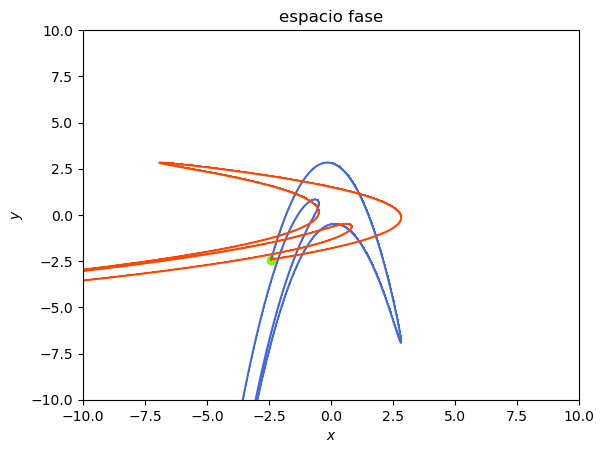

(-10.0, 10.0)

In [8]:
a=1.0
henon1(x,y)=Henon(x,y,a,1.)
henonI1(x,y)=HenonI(x,y,a,1.)
punto1 = parametro(a)


Orden = 105
tiempo = [0.,3.5]
delta_t = 0.125
Wu1,fu1,vecu1,valu1 = Inestable(henon1,Orden ,punto1,tiempo, delta_t);
Ws1,fs1,vecs1,vals1 = Inestable(henonI1, Orden , punto1, tiempo, delta_t);


pygui(false)
figure(1)
evaluar(Wu1, [0.,900.], 0.025, punto1, "royalblue")
evaluar(Ws1, [0.,-900], -0.025, punto1, "orangered")
scatter([punto1[1]],[punto1[2]],color="lawngreen")
xlim(-10,10)
ylim(-10,10)


Para encontrar al menos uno de los puntos periodicos necesitamos resolver 
$$\frac{2a}{(b+1)^{2}}y^{2}-\frac{y^{4}}{(b+1)^{2}}-(b+1)y-\frac{a^{2}}{(b+1)^{2}}+a=0\\
x=\frac{a-y^{2}}{b+1}$$
Como una condición para que sea un mapeo hamiltoniano es que $b=1$ entonces el sistema anterior se convierte en 
$$\frac{2a}{4}y^{2}-\frac{y^{4}}{4}-2y-\frac{a^{2}}{4}+a=0\\
x=\frac{a-y^{2}}{2}$$



In [10]:
using SymPy

In [12]:
y = Sym("y")
a = Sym("a")

a

⭐ Para $a=1$ tenemos el sistema

In [14]:
#ecuacion para y,a
s = (2*a*y^2)/4 -(y^4)/4.0-2.0*y+a-a^2/4.0

               2                      
        2   a⋅y              4        
- 0.25⋅a  + ──── + a - 0.25⋅y  - 2.0⋅y
             2                        

In [17]:
#sustituimos el valor de a 
s_n = subs(s,a,1.0)

        4        2               
- 0.25⋅y  + 0.5⋅y  - 2.0⋅y + 0.75

In [106]:
typeof(s_n)

Sym

In [18]:
#resolvemos para y
y_raices = solve(s_n)

4-element Array{Sym,1}:
       -2.41421356237309
       0.414213562373095
 1.0 - 1.4142135623731*I
 1.0 + 1.4142135623731*I

In [19]:
N.(y_raices)

4-element Array{Number,1}:
    -2.414213562373095
     0.41421356237309503
 1.0 - 1.4142135623730951im
 1.0 + 1.4142135623730951im

tomando en cuenta que $$x=\frac{a-y^{2}}{b+1}$$ y que $a=1,b=1$ entonces
$$x= \frac{1-y^{2}}{2}$$
sustituyendo los valores de $y$ reales encontrados...

In [20]:
#funcion para x del sistema 1
r(y,a) = (a-y^2)/2.0

r (generic function with 1 method)

In [21]:
r_n = subs(r(y,a),a,1.0)

           2
0.5 - 0.5⋅y 

In [22]:
#sustituimos el valor encontrado de y
pp_1x = subs(r_n(y),y,N.(y_raices[1])[1])

-2.41421356237309

In [54]:

typeof(N.(pp_1x)[1])

Float64

In [23]:
#Ponemos en una variable a la componenete y
pp_1y= N.(y_raices[1])[1]

-2.414213562373095

In [24]:
# 🔶 Primer punto de periodo 2 
pp1 = [pp_1x,pp_1y]

2-element Array{Sym,1}:
 -2.41421356237309
 -2.41421356237309

In [26]:
# 🔶 Segundo punto de periodo 2
p_period2 = [N.(y_raices)[2],subs(r_n(y),y,N.(y_raices)[2])]

2-element Array{Sym,1}:
 0.414213562373095
 0.414213562373095

In [27]:
# 🔶 Tercer punto de periodo 2
p_period3 = [N.(y_raices)[3],subs(r_n(y),y,N.(y_raices)[3])]

2-element Array{Sym,1}:
               1.0 - 1.4142135623731*I
 0.5 - 0.5*(1.0 - 1.4142135623731*I)^2

In [28]:
# 🔶 Cuarto Punto de periodo 2
p_period3 = [N.(y_raices)[4],subs(r_n(y),y,N.(y_raices)[4])]

2-element Array{Sym,1}:
               1.0 + 1.4142135623731*I
 0.5 - 0.5*(1.0 + 1.4142135623731*I)^2

Es importante descartar aquellos puntos que eran puntos fijos ❗ En este caso el primero, y los casos complejos no los tomaremos en cuenta.

In [31]:
typeof(N.(p_period2)[2])

Float64

In [41]:
α=1.0
henon1(x,y)=Henon(x,y,α,1.)

henon1 (generic function with 1 method)

In [42]:
henon1(N.(p_period2)[1],N.(p_period2)[2])

2-element Array{Float64,1}:
 0.41421356237309503
 0.41421356237309503

In [43]:
henon1(ans[1],ans[2])

2-element Array{Float64,1}:
 0.41421356237309503
 0.41421356237309503

In [44]:
henon1(ans[1],ans[2])

2-element Array{Float64,1}:
 0.41421356237309503
 0.41421356237309503

In [45]:
henon1(ans[1],ans[2])

2-element Array{Float64,1}:
 0.41421356237309503
 0.41421356237309503

In [46]:
#real points period 2
period2x = [N.(pp1)[1],N.(p_period2)[1]]
period2y = [N.(pp1)[2],N.(p_period2)[2]]

2-element Array{Float64,1}:
 -2.414213562373095
  0.41421356237309503

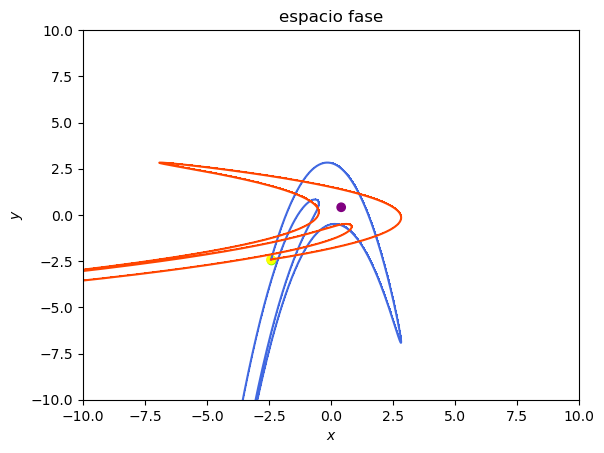

(-10.0, 10.0)

In [47]:
#los visualizamos en el espacio fase
evaluar(Wu1, [0.,900.], 0.025, punto1, "royalblue")
evaluar(Ws1, [0.,-900], -0.025, punto1, "orangered")
scatter([punto1[1]],[punto1[2]],color="lawngreen")
scatter(period2x,period2y,color = ["yellow","purple"])
xlim(-10,10)
ylim(-10,10)


## 💻 Lo implementamos 

In [64]:
α=0.0
henon1(x,y)=Henon(x,y,α,1.)
henonI1(x,y)=HenonI(x,y,α,1.)
punto1 = parametro(α)


Orden = 30
tiempo = [0.,3.5]
delta_t = 0.125
Wu1,fu1,vecu1,valu1 = Inestable(henon1,Orden ,punto1,tiempo, delta_t);
Ws1,fs1,vecs1,vals1 = Inestable(henonI1, Orden , punto1, tiempo, delta_t);



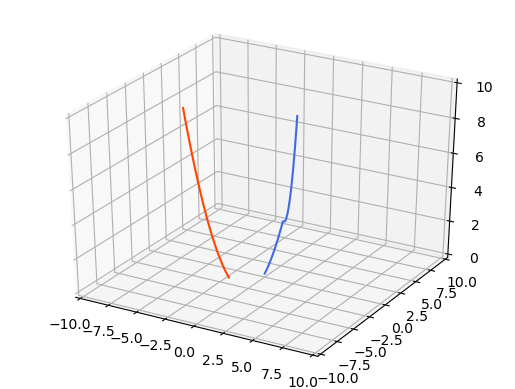

(-10.0, 10.0)

In [75]:
#X_l = zeros(10)
#Y_l = zeros(10)
X_l1 = []
Y_l1 = []
X_l2 = []
Y_l2 = []
#i = 0
for v_a in 0:0.2:10
 #   i += 1
    s_n = subs(s,a,v_a)
    y_r = SymPy.solve(s_n)
    r_n = subs(r(y,a),a,v_a)
    #sustituimos el valor encontrado de y
    x_r1 = subs(r_n(y),y,N.(y_r[1])[1]) #primer p fijo
    x_r2 = subs(r_n(y),y,N.(y_r[2])[1]) # segundo p fijo
    #primer punto fijo
    append!(X_l1,N.(x_r1)[1])
    append!(Y_l1,N.(y_r[1])[1])
    #segundo punto fijo
    append!(X_l2,N.(x_r2)[1])
    append!(Y_l2,N.(y_r[2])[1])
    #p_periodico1 = [N.(y_r)[1],subs(r_n(y),y,N.(y_r)[1])]
    #p_periodico2 = [N.(y_r)[2],subs(r_n(y),y,N.(y_r)[2])]
end
a_values = [i for i in 0:0.2:10.0]
pygui(false)
figure(1)
plot3D(X_l1,Y_l1,a_values,zdir="z",color="orangered")
plot3D(X_l2,Y_l2,a_values,zdir="z",color="royalblue")
#----
#B1= evaluar(Wu1, [0.,300.], 0.025, punto1, "lawngreen")
#B2 = evaluar(Ws1, [0.,-300], -0.025, punto1, "purple")
#plot3D(B1[2],B1[1],0.0,zdir="z",color="lawngreen",alpha=0.3)
#plot3D(B2[2],B2[1],0.0,zdir="z",color ="yellow",alpha=0.3)
#scatter!([punto1[1]],[punto1[2]],color="lawngreen")
xlim(-10,10)
ylim(-10,10)


Parece que en este caso si podemos parametrizar las curvas a sociadas a los puntos periodicos, busquemos puntos de periodo mas grande. 


## 🔮 En la búsqueda de puntos de periodo $n$

El mapeo de Hénon se ve como 
$$f(x,y)_{a,b}\begin{pmatrix}
x_n = a-by-x^{2}\\
y_n = x
\end{pmatrix}$$

buscamos encontrar puntos de periodo $n$ usando que un punto de periodo $n$ es un punto fijo de $f^{n}$

In [109]:
a = Sym("a")
x = Sym("x")
y = Sym("y")
henon_map = [a-y-x^2,x] #como objeto simbolico

2-element Array{Sym,1}:
 a - x^2 - y
           x

In [ ]:
@vars x y
eq1 = x + y -1
eq2 = x - y - (-1)
solve([eq1, eq2], [x,y])

In [110]:
henon_mapf(x,y,a) = [a-y-x^2,x] #como funcion de julia

henon_mapf (generic function with 1 method)

In [117]:
f2h(x,y,a) = henon_mapf(a-y-x^2,x,a) # como funcion de julia

f2h (generic function with 1 method)

In [126]:
#⭐ Puntos de periodo 3
f3 = f2h(a-y-x^2,x,a) - [x,y]#como objeto simbolico

2-element Array{Sym,1}:
 x^2 - x + y - (a - x - (a - x^2 - y)^2)^2
               a - x - y - (a - x^2 - y)^2

In [135]:
subs(f3[1],a,1.0)

                                           2
             ⎛                     2      ⎞ 
 2           ⎜     ⎛   2          ⎞       ⎟ 
x  - x + y - ⎝-x - ⎝- x  - y + 1.0⎠  + 1.0⎠ 

In [138]:
@vars x y
#es mas rapido y eficiente sustituir a y luego resolver ?
eq1 = subs(f3[1],a,1.0)
eq2 = subs(f3[2],a,1.0)
periodo3 = solve([eq1, eq2], [x,y])

5-element Array{Tuple{Sym,Sym},1}:
 (-2.41421356237309, -2.41421356237309)
 (0.0, 0.0)
 (0.0, 1.00000000000000)
 (0.414213562373095, 0.414213562373095)
 (1.00000000000000, 0.0)

In [141]:
N.(periodo3[1][1])

-2.414213562373095

In [151]:
#para revisar que sean de periodo 3 y no repetidos de periodo 2 o 1
henon_mapf(N.(periodo3[3][1]),N.(periodo3[3][2]),1.0)
# una forma mas eficiente de hacerlo seria usando un diccionario

2-element Array{Float64,1}:
 0.0
 0.0

In [152]:
henon_mapf(ans[1],ans[2],1.0)

2-element Array{Float64,1}:
 1.0
 0.0

In [153]:
henon_mapf(ans[1],ans[2],1.0)

2-element Array{Float64,1}:
 0.0
 1.0

con esto verificamos que es un punto de periodo 3.

In [167]:
X_l1 = []
Y_l1 = []

X_l2 = []
Y_l2 = []

X_l3 = []
Y_l3 = []
for v_a in -10.0:0.2:0.0
    #s_n = subs(s,a,v_a)
    #f_nn = subs(f3[1],a,1.0)
    @vars x y
    #es mas rapido y eficiente sustituir a y luego resolver ?
    eq1 = subs(f3[1],a,v_a)
    eq2 = subs(f3[2],a,v_a)
    periodo3 = solve([eq1, eq2], [x,y])
    append!(X_l1,N.(periodo3[3][1]))
    append!(Y_l1,N.(periodo3[3][2]))
    p3_2 = henon_mapf(N.(periodo3[3][1]),N.(periodo3[3][2]),v_a)
    append!(X_l2,p3_2[1])
    append!(Y_l2,p3_2[2])
    p3_3 = henon_mapf(N.(p3_2[1]),N.(p3_2[2]),v_a)
    append!(X_l3,p3_3[1])
    append!(Y_l3,p3_3[2])
    
end



In [169]:
a_values = [i for i in -10:0.2:0.0];
pygui(true)
figure(1)

plot3D(X_l1,Y_l1,a_values,zdir="z",color="orangered")
plot3D(X_l2,Y_l2,a_values,zdir="z",color="royalblue")
plot3D(X_l3,Y_l3,a_values,zdir="z",color="limegreen")

1-element Array{PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f4ba9212b10>

🔴 Al parecer no siempre podemos parametrizar ya que las curvas parecen ser no diferenciables. 